# Week 3 – Task 2: Song Genre Classification using Audio Features

In this notebook, we predict the genre of a song using features such as tempo, energy, danceability, and more. We'll use a labeled dataset and train a classification model to see how audio characteristics relate to genre.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
# Load your dataset here (adjust the file path accordingly)
# Example: Spotify Tracks Dataset
df = pd.read_csv("SpotifyFeatures.csv")  # Replace with your actual file

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64


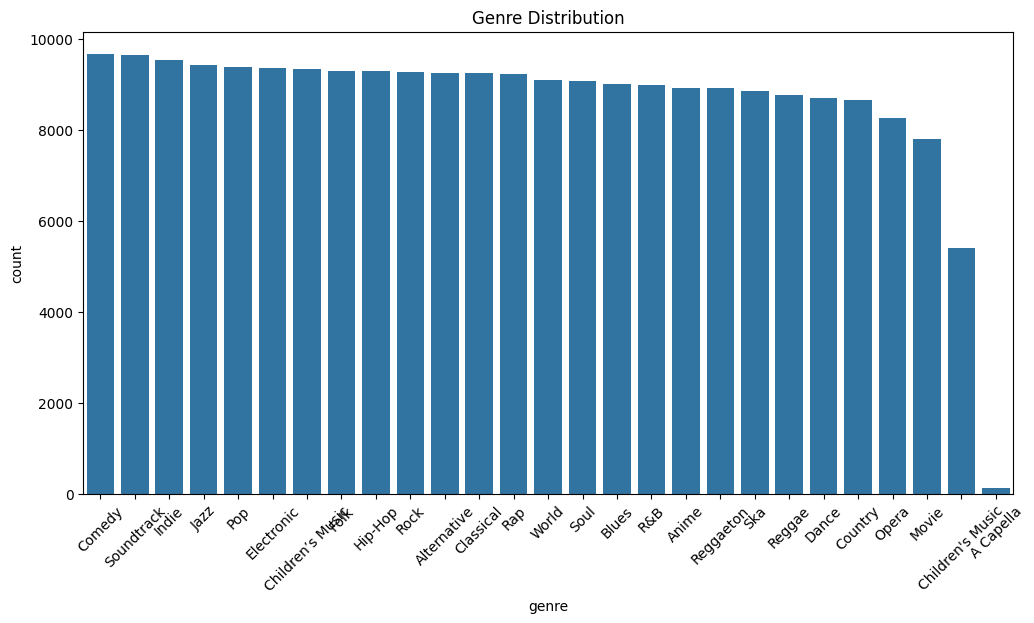

In [10]:
# Check class balance
print(df['genre'].value_counts())

# Visualize genre distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Genre Distribution")
plt.show()


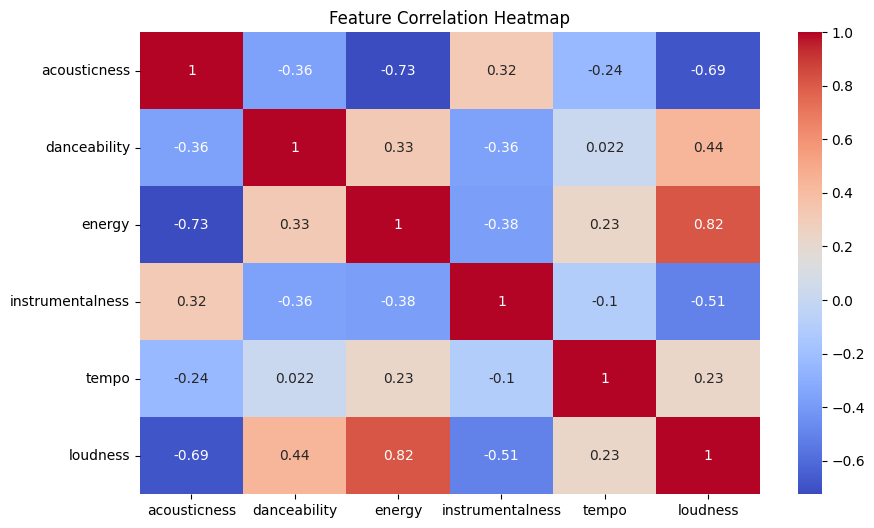

In [11]:
# Correlation heatmap
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo', 'loudness']
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
# Encode genre
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

# Select features and target
X = df[features]
y = df['genre_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))


Accuracy: 0.2443871522182834

Confusion Matrix:
[[   0    0    0    0    0    0    0    2    0    0    1    2    0    0
     0    1    8    0    0    0    1    1    0    0    0    0    3]
 [   0   36   33   54    4  660    2    7   51   73   50   43   70  121
    25    5    1   34  111   58   31   21  168   75   45    2   47]
 [   0   55  482   57   23   30   92    5  102   56  133   20   10   24
    65   36   27   26   19    5   19   35   32  196   21  209   69]
 [   0   39   57  342   50   24   12   30   74   18   83  173   11   45
   136   72   20   16   36   13   38   31   97  116  158   26   64]
 [   0    3   12   33  396    2   22   18   32   10   31   54   27   20
    66   77   23   10   31   15   47   46    6    6   49   19   11]
 [   0  715   27   42    1   16    2    3   43   69   13   51   81  184
    11    6    0   49  133   70   11    3  271   49   50    1   62]
 [   0   12   53   15   10    6  867    5    6    1   10   16    0    2
    32   38  324    2    0    0    1    

## Summary

In this task, we classified songs into genres based on their audio features using a Random Forest classifier.
We performed preprocessing, including scaling and label encoding, and explored the relationships between features using visualizations.
The model was evaluated using accuracy, confusion matrix, and F1-score.
This task helped reinforce understanding of feature engineering, classification, and model evaluation for real-world datasets.
